In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [3]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.acceptance import f_decline, f_decline_R50, f_decline_R75, f_decline_R100, f_decline_mixed
from MaaSSim.acceptance import RA_kpi_veh, RA_kpi_pax

In [4]:
import osmnx as ox
import networkx as nx
import random
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns
import folium
import h3

In [301]:
params = MaaSSim.utils.get_config('glance.json')
params.vehicle_fixed_positions = True
params.times.patience = 600 #in second
params.dist_threshold = 20000 #in meter
params.dist_threshold_min = 3000
params.city = "Amsterdam, Netherlands"
params.paths.G = "../../data/graphs/Amsterdam.graphml"
params.paths.skim = "../../data/graphs/Amsterdam.csv"

params.d2d.fuel_cost = 0.25 #euro/km
params.platforms.comm_rate = 0
params.platforms.base_fare = 2
params.platforms.fare = 1.2 
params.platforms.min_fare = 2
params.speeds.ride=10
params.times.decline=20
params.assert_me = False

params.paths.requests = 'Amsterdam_requests_new.csv'
params.zoning_level = 7

params.nP = 10000
params.nV = 400
params.start_time = pd.Timestamp('1900-01-01 08:00:00')
params.simTime = 8
params.end_time = params.start_time + pd.Timedelta(int(params.simTime), 'h')
# params.end_time = pd.Timestamp('1900-01-01 16:00:00')


pd.set_option('display.max_rows', 100)

In [302]:
sim400l7 = MaaSSim.simulators.simulate(params=params, f_driver_decline=f_decline)

21-09-22 21:48:00-WARNING-Setting up 8h simulation at 1900-01-01 11:01:00 for 400 vehicles and 10000 passengers in Amsterdam, Netherlands
21-09-22 21:48:19-INFO--------------------	Starting simulation	-------------------
21-09-22 21:48:30-WARNING-pax 4633  got rejected by vehicle 4                1900-01-01 11:01:00
21-09-22 21:50:13-WARNING-pax 4633  got rejected by vehicle 318              1900-01-01 11:01:30
21-09-22 21:50:15-WARNING-pax 5031  got rejected by vehicle 118              1900-01-01 11:02:00
21-09-22 21:50:22-WARNING-pax 6382  got rejected by vehicle 354              1900-01-01 11:04:00
21-09-22 21:50:24-WARNING-pax 7263  got rejected by vehicle 283              1900-01-01 11:04:00
21-09-22 21:50:25-WARNING-pax 6382  got rejected by vehicle 49               1900-01-01 11:04:30
21-09-22 21:50:27-WARNING-pax 2939  got rejected by vehicle 119              1900-01-01 11:05:00
21-09-22 21:50:31-WARNING-pax 9670  got rejected by vehicle 128              1900-01-01 11:05:00
21-

In [236]:
sim200l7v2 = sim400l7

In [68]:
total_rej = len(sim200l7.sss['rej_upto1']) + len(sim200l7.sss['rej_upto2']) + len(sim200l7.sss['rej_upto3']) + len(sim200l7.sss['rej_upto4']) + len(sim200l7.sss['rej_upto5']) + len(sim200l7.sss['rej_above5'])
total_acc = len(sim200l7.sss['acc_upto1']) + len(sim200l7.sss['acc_upto2']) + len(sim200l7.sss['acc_upto3']) + len(sim200l7.sss['acc_upto4']) + len(sim200l7.sss['acc_upto5']) + len(sim200l7.sss['acc_above5'])

print('total rejected requests', total_rej)
print('total accepted requests', total_acc)

total rejected requests 1409
total accepted requests 7361


In [69]:
print('percentage of upto 1 rejected requests = ', len(100*sim200l7.sss['rej_upto1'])/total_rej)
print('percentage of upto 1 rejected requests = ', len(100*sim200l7.sss['rej_upto2'])/total_rej)
print('percentage of upto 1 rejected requests = ', len(100*sim200l7.sss['rej_upto3'])/total_rej)
print('percentage of upto 3 rejected requests = ', len(100*sim200l7.sss['rej_upto4'])/total_rej)
print('percentage of upto 5 rejected requests = ', len(100*sim200l7.sss['rej_upto5'])/total_rej)
print('percentage of above 5 rejected requests = ', len(100*sim200l7.sss['rej_above5'])/total_rej)

percentage of upto 1 rejected requests =  24.982256919801276
percentage of upto 1 rejected requests =  14.478353442157559
percentage of upto 1 rejected requests =  10.361958836053939
percentage of upto 3 rejected requests =  7.5230660042583395
percentage of upto 5 rejected requests =  7.8069552874379
percentage of above 5 rejected requests =  34.84740951029099


In [70]:
print('percentage of upto 1 accepted requests = ', len(100*sim200l7.sss['acc_upto1'])/total_acc)
print('percentage of upto 1 accepted requests = ', len(100*sim200l7.sss['acc_upto2'])/total_acc)
print('percentage of upto 1 accepted requests = ', len(100*sim200l7.sss['acc_upto3'])/total_acc)
print('percentage of upto 3 accepted requests = ', len(100*sim200l7.sss['acc_upto4'])/total_acc)
print('percentage of upto 5 accepted requests = ', len(100*sim200l7.sss['acc_upto5'])/total_acc)
print('percentage of above 5 accepted requests = ', len(100*sim200l7.sss['acc_above5'])/total_acc)

percentage of upto 1 accepted requests =  22.510528460806956
percentage of upto 1 accepted requests =  14.332291808178237
percentage of upto 1 accepted requests =  10.854503464203233
percentage of upto 3 accepted requests =  8.803151745686728
percentage of upto 5 accepted requests =  6.996332020105964
percentage of above 5 accepted requests =  36.50319250101888


In [87]:
total_rej = len(sim300l7.sss['rej_upto1']) + len(sim300l7.sss['rej_upto2']) + len(sim300l7.sss['rej_upto3']) + len(sim300l7.sss['rej_upto4']) + len(sim300l7.sss['rej_upto5']) + len(sim300l7.sss['rej_above5'])
total_acc = len(sim300l7.sss['acc_upto1']) + len(sim300l7.sss['acc_upto2']) + len(sim300l7.sss['acc_upto3']) + len(sim300l7.sss['acc_upto4']) + len(sim300l7.sss['acc_upto5']) + len(sim300l7.sss['acc_above5'])

print('total rejected requests', total_rej)
print('total accepted requests', total_acc)

total rejected requests 1950
total accepted requests 9229


In [88]:
print('percentage of upto 1 rejected requests = ', len(100*sim300l7.sss['rej_upto1'])/total_rej)
print('percentage of upto 1 rejected requests = ', len(100*sim300l7.sss['rej_upto2'])/total_rej)
print('percentage of upto 1 rejected requests = ', len(100*sim300l7.sss['rej_upto3'])/total_rej)
print('percentage of upto 3 rejected requests = ', len(100*sim300l7.sss['rej_upto4'])/total_rej)
print('percentage of upto 5 rejected requests = ', len(100*sim300l7.sss['rej_upto5'])/total_rej)
print('percentage of above 5 rejected requests = ', len(100*sim300l7.sss['rej_above5'])/total_rej)

percentage of upto 1 rejected requests =  61.8974358974359
percentage of upto 1 rejected requests =  8.35897435897436
percentage of upto 1 rejected requests =  6.461538461538462
percentage of upto 3 rejected requests =  4.512820512820513
percentage of upto 5 rejected requests =  3.282051282051282
percentage of above 5 rejected requests =  15.487179487179487


In [89]:
print('percentage of upto 1 accepted requests = ', len(100*sim300l7.sss['acc_upto1'])/total_acc)
print('percentage of upto 1 accepted requests = ', len(100*sim300l7.sss['acc_upto2'])/total_acc)
print('percentage of upto 1 accepted requests = ', len(100*sim300l7.sss['acc_upto3'])/total_acc)
print('percentage of upto 3 accepted requests = ', len(100*sim300l7.sss['acc_upto4'])/total_acc)
print('percentage of upto 5 accepted requests = ', len(100*sim300l7.sss['acc_upto5'])/total_acc)
print('percentage of above 5 accepted requests = ', len(100*sim300l7.sss['acc_above5'])/total_acc)

percentage of upto 1 accepted requests =  58.60873334055694
percentage of upto 1 accepted requests =  9.29678188319428
percentage of upto 1 accepted requests =  6.414562791201647
percentage of upto 3 accepted requests =  4.485859789793044
percentage of upto 5 accepted requests =  3.72738108137393
percentage of above 5 accepted requests =  17.46668111388016


In [ ]:
--------------------------------------------------

In [304]:
f = pd.DataFrame()

In [303]:
total_rej = len(sim400l7.sss['rej_upto1']) + len(sim400l7.sss['rej_upto2']) + len(sim400l7.sss['rej_upto3']) + len(sim400l7.sss['rej_upto4']) + len(sim400l7.sss['rej_upto5']) + len(sim400l7.sss['rej_above5'])
total_acc = len(sim400l7.sss['acc_upto1']) + len(sim400l7.sss['acc_upto2']) + len(sim400l7.sss['acc_upto3']) + len(sim400l7.sss['acc_upto4']) + len(sim400l7.sss['acc_upto5']) + len(sim400l7.sss['acc_above5'])

total_acc+total_rej

11731

In [327]:
import h3
level = 7

interval = 'acc_above5'
df = pd.DataFrame()
df['request_id'] =  sim400l7.sss[interval]
df['origin'] = df.apply(lambda row: sim400l7.pax[row['request_id']].request['origin'], axis=1)
df['bucket'] = interval
df['zone'] = df.apply(lambda row: h3.geo_to_h3(sim400l7.inData.G.nodes[sim400l7.pax[row['request_id']].request['origin']]['y'],
                                               sim400l7.inData.G.nodes[sim400l7.pax[row['request_id']].request['origin']]['x'], level), axis=1)
df['time'] = df.apply(lambda row: sim400l7.pax[row['request_id']].request['treq'], axis=1) 

df

,request_id,origin,bucket,zone,time
0,1483,46331712,acc_above5,871969536ffffff,1900-01-01 13:56:00
1,5895,46331712,acc_above5,871969536ffffff,1900-01-01 13:56:00
2,2040,46363377,acc_above5,871969536ffffff,1900-01-01 13:56:00
3,741,1429031808,acc_above5,871969536ffffff,1900-01-01 13:57:00
4,5703,2599727053,acc_above5,871969536ffffff,1900-01-01 13:58:00
...,...,...,...,...,...
777,166,700343183,acc_above5,871968269ffffff,1900-01-01 17:56:00
778,410,798747237,acc_above5,871969530ffffff,1900-01-01 18:01:00
779,7059,46477589,acc_above5,871968269ffffff,1900-01-01 18:03:00
780,2566,2101786758,acc_above5,871969530ffffff,1900-01-01 18:06:00


In [328]:
f = pd.concat([f, df])
f

,request_id,origin,bucket,zone,time
0,4633,46323168,rej_upto1,871969532ffffff,1900-01-01 11:01:00
1,4633,46323168,rej_upto1,871969532ffffff,1900-01-01 11:01:00
2,5031,1978342133,rej_upto1,871969534ffffff,1900-01-01 11:02:00
3,6382,46329410,rej_upto1,871969530ffffff,1900-01-01 11:04:00
4,7263,46318948,rej_upto1,871969532ffffff,1900-01-01 11:04:00
...,...,...,...,...,...
777,166,700343183,acc_above5,871968269ffffff,1900-01-01 17:56:00
778,410,798747237,acc_above5,871969530ffffff,1900-01-01 18:01:00
779,7059,46477589,acc_above5,871968269ffffff,1900-01-01 18:03:00
780,2566,2101786758,acc_above5,871969530ffffff,1900-01-01 18:06:00


In [329]:
f.to_csv('sim400l7v2.csv')

In [ ]:
----------------------------------------------------------------

In [43]:
def visualize_hexagons(hexagons, color="red", w=1, folium_map=None):
    """
    hexagons is a list of hexcluster. Each hexcluster is a list of hexagons. 
    eg. [[hex1, hex2], [hex3, hex4]]
    """
    polylines = []
    lat = []
    lng = []
    for hex in hexagons:
        polygons = h3.h3_set_to_multi_polygon([hex], geo_json=False)
        # flatten polygons into loops.
        outlines = [loop for polygon in polygons for loop in polygon]
        polyline = [outline + [outline[0]] for outline in outlines][0]
        lat.extend(map(lambda v:v[0],polyline))
        lng.extend(map(lambda v:v[1],polyline))
        polylines.append(polyline)
    
    if folium_map is None:
        m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=13, tiles='cartodbpositron')
    else:
        m = folium_map
    for polyline in polylines:
        my_PolyLine=folium.PolyLine(locations=polyline,weight=w,color=color,fill= True)
        m.add_child(my_PolyLine)
    return m
    

def visualize_polygon(polyline, color):
    polyline.append(polyline[0])
    lat = [p[0] for p in polyline]
    lng = [p[1] for p in polyline]
    m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=13, tiles='cartodbpositron')
    my_PolyLine=folium.PolyLine(locations=polyline,weight=8,color=color)
    m.add_child(my_PolyLine)
    return m

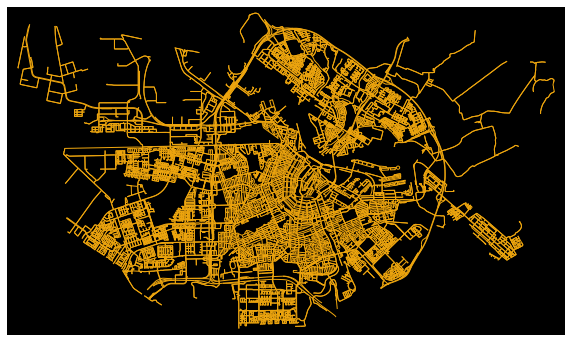

In [44]:
G = sim.inData.G
fig, ax = ox.plot_graph(G, figsize=(10, 10), show=False, close=False, node_size=0, bgcolor='black', 
                        edge_color=(0.933, 0.65, 0.059))

In [45]:
# Visualiziation of hexagons on Amsterdam map
lat = []
lng = []
for i in G.nodes:
    lat.append(G.nodes[i]['y'])
    lng.append(G.nodes[i]['x'])
    
df = pd.DataFrame()
df['lat'] = lat
df['lng'] = lng

level = 7
hex_col = 'hex'+str(level)
df[hex_col] = df.apply(lambda x: h3.geo_to_h3(x.lat,x.lng,level),axis=1)
df = df.groupby(hex_col).size().to_frame('cnt').reset_index()

l = list(df[hex_col])
m = visualize_hexagons(l)
display(m)

In [46]:
hex_address = ['871969c9bffffff']
# hex_address = f.loc[f.bucket=='acc_above5'].zone.unique()
# hex_address = ['871969c9bffffff', '871969535ffffff', '871969534ffffff', '871969526ffffff', '871969522ffffff']
m = visualize_hexagons(hex_address)
display(m)

In [159]:
f['val'] = 1
f.loc[f.bucket=='acc_above5'].groupby(['zone']).sum()

,request_id,origin,val
zone,,,
87196824dffffff,79259,13712746324,18
871968269ffffff,96289,15456776557,23
87196826bffffff,161326,11258057067,35
871969504ffffff,18119,6374271315,4
871969520ffffff,119612,16973455831,21
871969521ffffff,23269,323739561,7
871969522ffffff,508224,62140210762,100
871969524ffffff,331299,40832056928,63
871969525ffffff,3598,974089157,1


In [ ]:
-------------------------------------------------------------------

In [128]:
x = f.loc[(pd.Timestamp('1900-01-01 08:00:00')<f.time) & (f.time<pd.Timestamp('1900-01-01 09:00:00'))]
len(x)*100/len(f)

13.945791215672243

In [129]:
x = f.loc[(pd.Timestamp('1900-01-01 09:00:00')<f.time) & (f.time<pd.Timestamp('1900-01-01 10:00:00'))]
len(x)*100/len(f)

12.86340459790679

In [130]:
x = f.loc[(pd.Timestamp('1900-01-01 10:00:00')<f.time) & (f.time<pd.Timestamp('1900-01-01 11:00:00'))]
len(x)*100/len(f)

9.777260935682976

In [131]:
x = f.loc[(pd.Timestamp('1900-01-01 11:00:00')<f.time) & (f.time<pd.Timestamp('1900-01-01 12:00:00'))]
len(x)*100/len(f)

12.559262903658645

In [132]:
x = f.loc[(pd.Timestamp('1900-01-01 12:00:00')<f.time) & (f.time<pd.Timestamp('1900-01-01 13:00:00'))]
len(x)*100/len(f)

9.535736649074156

In [133]:
x = f.loc[(pd.Timestamp('1900-01-01 13:00:00')<f.time) & (f.time<pd.Timestamp('1900-01-01 14:00:00'))]
len(x)*100/len(f)

13.480633330351552

In [134]:
x = f.loc[(pd.Timestamp('1900-01-01 14:00:00')<f.time) & (f.time<pd.Timestamp('1900-01-01 15:00:00'))]
len(x)*100/len(f)

12.657661687091869

In [135]:
x = f.loc[(pd.Timestamp('1900-01-01 15:00:00')<f.time) & (f.time<pd.Timestamp('1900-01-01 16:00:00'))]
len(x)*100/len(f)

14.384113069147508

In [ ]:
=========================================================================

In [147]:
f = pd.read_csv('Amsterdam_requests_new.csv')
f.treq = f.apply(lambda row: pd.Timestamp(row.treq), axis=1)
f

,Unnamed: 0,origin,destination,treq,tarr,ttrav,dist,orig_geo,dest_geo,origin_y,origin_x,destination_y,destination_x,haver_dist
0,0,46343829,5777055555,1900-01-01 19:36:00,1900-01-01 20:00:00,0 days 00:24:00.000000000,2696,POINT (4.8889728 52.3618803),POINT (4.8947789 52.3796757),52.361880,4.888973,52.379676,4.894779,2017.639692
1,1,1525015196,2020569141,1900-01-01 18:29:00,1900-01-01 18:53:00,0 days 00:24:00.000000000,3489,POINT (4.9062867 52.3591398),POINT (4.8847412 52.3739514),52.359140,4.906287,52.373951,4.884741,2202.841087
2,2,46484989,6219354473,1900-01-01 13:24:00,1900-01-01 13:48:00,0 days 00:24:00.000000000,5152,POINT (4.8663224 52.3934468),POINT (4.8811843 52.4257211),52.393447,4.866322,52.425721,4.881184,3727.642905
3,4,46445391,1732413559,1900-01-01 14:59:00,1900-01-01 15:28:00,0 days 00:29:00.000000000,4787,POINT (4.8225358 52.3841401),POINT (4.7929588 52.3574315),52.384140,4.822536,52.357431,4.792959,3584.982166
4,5,442534817,46453553,1900-01-01 11:30:00,1900-01-01 12:16:00,0 days 00:46:00.000000000,2440,POINT (4.8042997 52.3903223),POINT (4.8330381 52.3859123),52.390322,4.804300,52.385912,4.833038,2010.989249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93291,100316,2101786750,520376452,1900-01-01 13:20:00,1900-01-01 16:01:00,0 days 02:41:00.000000000,3198,POINT (4.8395385 52.345118),POINT (4.8273257 52.3651666),52.345118,4.839538,52.365167,4.827326,2378.601141
93292,100317,30154649,46282361,1900-01-01 19:36:00,1900-01-01 20:00:00,0 days 00:24:00.000000000,5797,POINT (4.9420068 52.3601681),POINT (4.869708 52.3477848),52.360168,4.942007,52.347785,4.869708,5099.651861
93293,100318,46419807,46330781,1900-01-01 23:02:00,1900-01-01 23:25:00,0 days 00:23:00.000000000,3290,POINT (4.8942334 52.3786703),POINT (4.8928959 52.358953),52.378670,4.894233,52.358953,4.892896,2194.346460
93294,100319,46244835,46519996,1900-01-01 10:06:00,1900-01-01 10:32:00,0 days 00:26:00.000000000,9877,POINT (4.9388043 52.3393751),POINT (4.9167433 52.4049547),52.339375,4.938804,52.404955,4.916743,7444.338424


In [155]:
x = f.loc[(pd.Timestamp('1900-01-01 05:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 06:00:00'))]
len(x)*100/len(f)

0.195078031212485

In [154]:
x = f.loc[(pd.Timestamp('1900-01-01 06:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 07:00:00'))]
len(x)*100/len(f)

2.1480020579660435

In [153]:
x = f.loc[(pd.Timestamp('1900-01-01 07:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 08:00:00'))]
len(x)*100/len(f)

6.143886125878923

In [138]:
x = f.loc[(pd.Timestamp('1900-01-01 08:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 09:00:00'))]
len(x)*100/len(f)

7.489067055393586

In [139]:
x = f.loc[(pd.Timestamp('1900-01-01 09:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 10:00:00'))]
len(x)*100/len(f)

6.275724575544504

In [140]:
x = f.loc[(pd.Timestamp('1900-01-01 10:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 11:00:00'))]
len(x)*100/len(f)

4.505016292231178

In [141]:
x = f.loc[(pd.Timestamp('1900-01-01 11:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 12:00:00'))]
len(x)*100/len(f)

6.27250900360144

In [142]:
x = f.loc[(pd.Timestamp('1900-01-01 12:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 13:00:00'))]
len(x)*100/len(f)

4.966986794717887

In [143]:
x = f.loc[(pd.Timestamp('1900-01-01 13:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 14:00:00'))]
len(x)*100/len(f)

7.662707940318985

In [144]:
x = f.loc[(pd.Timestamp('1900-01-01 14:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 15:00:00'))]
len(x)*100/len(f)

6.207125707425828

In [145]:
x = f.loc[(pd.Timestamp('1900-01-01 15:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 16:00:00'))]
len(x)*100/len(f)

7.664851654947693

In [156]:
x = f.loc[(pd.Timestamp('1900-01-01 16:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 17:00:00'))]
len(x)*100/len(f)

7.908163265306122

In [152]:
x = f.loc[(pd.Timestamp('1900-01-01 17:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 18:00:00'))]
len(x)*100/len(f)

12.357442977190876

In [150]:
x = f.loc[(pd.Timestamp('1900-01-01 18:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 19:00:00'))]
len(x)*100/len(f)

6.728048362202023

In [ ]:
x = f.loc[(pd.Timestamp('1900-01-01 19:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 20:00:00'))]
len(x)*100/len(f)

4.608986451723546

In [149]:
x = f.loc[(pd.Timestamp('1900-01-01 20:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 21:00:00'))]
len(x)*100/len(f)

2.3613016635225517

In [ ]:
-========================================================================

In [237]:
def generate_table(path, s):
    
    table = pd.DataFrame(columns=['time', 'upto_1', 'upto_2', 'upto_3', 'upto_4', 'upto_5', 'above_5', 'total_request_number'])
    
    if s == 8:
        table.time = ['8:00-9:00', '9:00-10:00', '10:00-11:00', '11:00-12:00', '12:00-13:00', '13:00-14:00', 
                      '14:00-15:00', '15:00-16:00'] # with s=8
    if s == 11
        table.time = ['11:00-12:00', '12:00-13:00', '13:00-14:00', '14:00-15:00', '15:00-16:00',
                      '16:00-17:00', '17:00-18:00', '18:00-19:00'] # with s=11


    df = pd.read_csv(path)
    df.time = df.apply(lambda row: pd.Timestamp(row.time), axis=1)

    j = 0
    for i in range(0,8):
        x = df.loc[(pd.Timestamp('1900-01-01 0{}:00:00'.format(s+i))<df.time) & 
                   (df.time<=pd.Timestamp('1900-01-01 0{}:00:00'.format(s+1+i)))].copy()

        table.at[i, 'total_request_number'] = len(x)
        table.at[i, 'upto_1'] =100*len(x.loc[(x.bucket=='rej_upto1') | (x.bucket=='acc_upto1')]) /len(x)
        table.at[i, 'upto_2'] =100*len(x.loc[(x.bucket=='rej_upto2') | (x.bucket=='acc_upto2')]) /len(x)
        table.at[i, 'upto_3'] =100*len(x.loc[(x.bucket=='rej_upto3') | (x.bucket=='acc_upto3')]) /len(x)
        table.at[i, 'upto_4'] =100*len(x.loc[(x.bucket=='rej_upto4') | (x.bucket=='acc_upto4')]) /len(x)
        table.at[i, 'upto_5'] =100*len(x.loc[(x.bucket=='rej_upto5') | (x.bucket=='acc_upto5')]) /len(x)
        table.at[i, 'above_5'] =100*len(x.loc[(x.bucket=='rej_above5') | (x.bucket=='acc_above5')]) /len(x)


    return table

In [203]:
generate_table(path = 'sim200l7.csv', s=8)

,time,upto_1,upto_2,upto_3,upto_4,upto_5,above_5,total_request_number
0,8:00-9:00,27.364865,8.614865,7.347973,6.756757,7.010135,42.905405,1184
1,9:00-10:00,17.504488,15.35009,11.310592,10.32316,8.078995,37.432675,1114
2,10:00-11:00,40.936255,16.533865,11.85259,7.270916,5.079681,18.326693,1004
3,11:00-12:00,25.626741,14.206128,9.192201,8.449396,7.520891,35.004643,1077
4,12:00-13:00,35.005118,23.541453,14.738997,9.211873,6.141249,11.36131,977
5,13:00-14:00,15.799087,12.146119,8.949772,6.30137,5.479452,51.324201,1095
6,14:00-15:00,11.934901,14.647378,12.929476,11.663653,9.584087,39.240506,1106
7,15:00-16:00,12.860676,11.706513,10.63479,8.821105,7.749382,48.227535,1213


In [204]:
generate_table(path = 'sim300l7.csv', s=8)

,time,upto_1,upto_2,upto_3,upto_4,upto_5,above_5,total_request_number
0,8:00-9:00,43.456163,12.833545,8.322745,6.226175,5.654384,23.506989,1574
1,9:00-10:00,63.303386,6.357982,6.288874,3.870076,3.386317,16.793366,1447
2,10:00-11:00,96.192203,2.538531,0.634633,0.181324,0.271985,0.181324,1103
3,11:00-12:00,75.124026,4.323175,3.614458,3.047484,2.197023,11.693834,1411
4,12:00-13:00,89.186691,4.436229,2.402957,1.848429,0.831793,1.2939,1082
5,13:00-14:00,56.028834,4.325033,3.211009,2.555701,3.079948,30.799476,1526
6,14:00-15:00,40.826331,20.938375,12.815126,7.703081,5.252101,12.464986,1428
7,15:00-16:00,30.597015,13.992537,11.19403,8.333333,6.529851,29.353234,1608


In [233]:
generate_table(path = 'sim400l7.csv', s=8)

,time,upto_1,upto_2,upto_3,upto_4,upto_5,above_5,total_request_number
0,8:00-9:00,72.597254,9.038902,5.606407,4.061785,2.345538,6.350114,1748
1,9:00-10:00,88.839849,5.737705,2.774275,1.450189,0.693569,0.504414,1586
2,10:00-11:00,100.0,0.0,0.0,0.0,0.0,0.0,1096
3,11:00-12:00,95.621378,1.996137,0.965873,0.450741,0.128783,0.83709,1553
4,12:00-13:00,98.139535,1.209302,0.55814,0.093023,0.0,0.0,1075
5,13:00-14:00,74.332765,3.407155,2.896082,2.78251,2.896082,13.685406,1761
6,14:00-15:00,93.495935,2.574526,1.829268,1.01626,0.474255,0.609756,1476
7,15:00-16:00,83.841132,3.754081,2.774755,2.067465,1.25136,6.311208,1838


In [269]:
generate_table(path = 'sim200l7v2.csv', s=11)

,time,upto_1,upto_2,upto_3,upto_4,upto_5,above_5,total_request_number
0,11:00-12:00,61.764706,6.666667,5.098039,3.72549,2.54902,20.196078,1020
1,12:00-13:00,40.204082,20.918367,14.081633,7.346939,5.612245,11.836735,980
2,13:00-14:00,24.570912,13.730804,11.562782,7.949413,7.67841,34.507678,1107
3,14:00-15:00,26.96737,18.522073,12.284069,10.652591,7.965451,23.608445,1042
4,15:00-16:00,19.329214,17.917034,13.503972,9.002648,5.383936,34.863195,1133
5,16:00-17:00,13.560886,11.99262,9.870849,11.254613,9.501845,43.819188,1084
6,17:00-18:00,4.851752,5.211141,5.840072,6.828392,5.750225,71.518419,1113
7,18:00-19:00,21.047619,16.285714,12.666667,8.190476,6.47619,35.333333,1050


In [300]:
generate_table(path = 'sim300l7v2.csv', s=11)

,time,upto_1,upto_2,upto_3,upto_4,upto_5,above_5,total_request_number
0,11:00-12:00,86.688051,4.410585,3.287891,2.004812,1.202887,2.405774,1247
1,12:00-13:00,96.206226,2.431907,0.680934,0.583658,0.0,0.097276,1028
2,13:00-14:00,72.575017,4.884857,3.907886,3.628751,2.721563,12.281926,1433
3,14:00-15:00,77.714286,8.571429,5.142857,4.0,2.204082,2.367347,1225
4,15:00-16:00,80.510753,3.225806,2.755376,2.822581,1.88172,8.803763,1488
5,16:00-17:00,30.053908,18.463612,14.083558,9.636119,6.738544,21.024259,1484
6,17:00-18:00,10.596833,7.673569,8.282582,6.211937,6.394641,60.840438,1642
7,18:00-19:00,46.625767,18.481595,11.042945,6.748466,4.754601,12.346626,1304


In [331]:
generate_table(path = 'sim400l7v2.csv', s=11)

,time,upto_1,upto_2,upto_3,upto_4,upto_5,above_5,total_request_number
0,11:00-12:00,99.920446,0.079554,0.0,0.0,0.0,0.0,1257
1,12:00-13:00,100.0,0.0,0.0,0.0,0.0,0.0,1041
2,13:00-14:00,94.480103,2.503209,1.604621,0.706033,0.320924,0.385109,1558
3,14:00-15:00,99.015587,0.574241,0.328138,0.082034,0.0,0.0,1219
4,15:00-16:00,97.234444,1.571339,0.691389,0.251414,0.188561,0.062854,1591
5,16:00-17:00,98.884758,0.991326,0.123916,0.0,0.0,0.0,1614
6,17:00-18:00,37.476281,6.309298,4.83871,4.26945,4.174573,42.931689,2108
7,18:00-19:00,87.267312,3.946389,3.499628,1.935964,0.967982,2.382725,1343
